In [44]:
import numpy as np
import yfinance as yf

START_DATE = '2016-01-01'
PERIODS = [21, 63, 252]

rfr = yf.download('^IRX', start=START_DATE, auto_adjust=True, progress=False)
rfr.drop(['Open', 'High', 'Low', 'Volume'], axis=1, inplace=True)
rfr.rename(columns={'Close': 'Index'}, inplace=True)

In [45]:
rfr['Return'] = rfr['Index'] / 100
rfr['Daily Return'] = (1 + rfr['Return']) ** (1/252) - 1

# Optional: Convert to log returns, although these numbers are so small, does it matter?
# rfr['Daily Return'] = np.log(rfr['Daily Return'] + 1)

for p in PERIODS:
    rfr[str(p) + 'D Return'] = rfr['Daily Return'].rolling(p).sum()
    rfr[str(p) + 'D Ann. Return'] = (1 + rfr[str(p) + 'D Return']) ** (252/p) - 1

In [46]:
rfr.tail(50)

,Index,Return,Daily Return,21D Return,21D Ann. Return,63D Return,63D Ann. Return,252D Return,252D Ann. Return
Date,,,,,,,,,
2020-02-05,1.520,0.01520,5.986543e-05,0.001251,0.015119,0.003764,0.015140,0.019500,0.019500
2020-02-06,1.530,0.01530,6.025632e-05,0.001252,0.015134,0.003766,0.015148,0.019468,0.019468
2020-02-07,1.518,0.01518,5.978725e-05,0.001253,0.015146,0.003766,0.015150,0.019436,0.019436
2020-02-10,1.520,0.01520,5.986543e-05,0.001254,0.015155,0.003766,0.015150,0.019404,0.019404
2020-02-11,1.538,0.01538,6.056900e-05,0.001256,0.015174,0.003767,0.015154,0.019371,0.019371
2020-02-12,1.535,0.01535,6.045175e-05,0.001257,0.015186,0.003768,0.015157,0.019339,0.019339
2020-02-13,1.545,0.01545,6.084258e-05,0.001257,0.015193,0.003769,0.015162,0.019308,0.019308
2020-02-14,1.535,0.01535,6.045175e-05,0.001258,0.015206,0.003770,0.015166,0.019275,0.019275
2020-02-18,1.535,0.01535,6.045175e-05,0.001259,0.015214,0.003770,0.015166,0.019242,0.019242


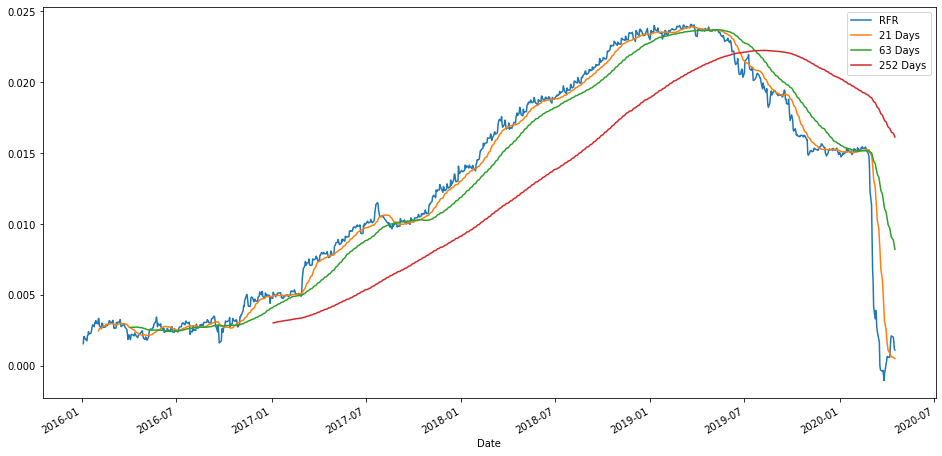

In [47]:
import matplotlib.pyplot as plt

%matplotlib inline

rfr['Return'].plot(label='RFR', figsize=(16,8))

for p in PERIODS:
    rfr[str(p) + 'D Ann. Return'].plot(label=str(p)+' Days')

plt.legend()